In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# Import CSV file
merged_df = pd.read_csv('calc.csv')
merged_df

,Year,Washington County: Annual Housing Supply,Clackamas County: Annual Housing Supply,Multnomah County: Annual Housing Supply,Average Rate,Washington County: Median Home Values,Clackamas County: Median Home Values,Multnomah County: Median Home Values
0,2019,18173,14984,14984,4.0,386600,395100,386200
1,2020,26155,13512,13512,3.0,413500,421100,410800
2,2021,20742,15228,15228,3.0,439300,452200,437600
3,2022,20230,13540,13540,5.0,504300,532200,492100
4,2023,19575,10398,10398,7.0,558500,577900,528000


# Mortgage Rates vs Home Values Graph

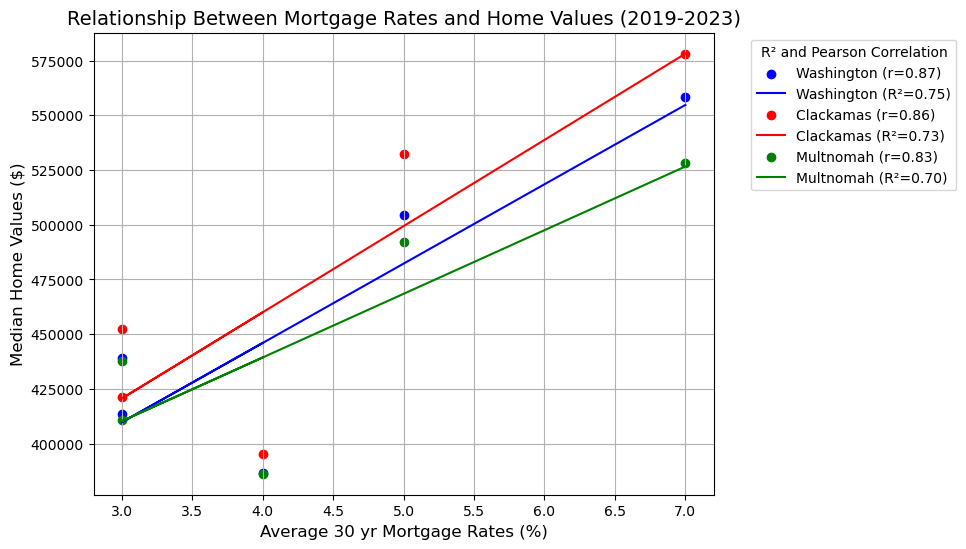

Washington County: R²=0.7497, Pearson Correlation=0.8659
Clackamas County: R²=0.7344, Pearson Correlation=0.8570
Multnomah County: R²=0.6963, Pearson Correlation=0.8344


In [12]:
# Function for Combined Linear Regression Plot
def plot_combined_regression(x_values, y_wash, y_clack, y_mult, xlabel):
    plt.figure(figsize=(8, 6))

    # Linear regression & Pearson correlation for Washington County
    slope_w, intercept_w, rvalue_w, pvalue_w, stderr_w = st.linregress(x_values, y_wash)
    correlation_w, _ = st.pearsonr(x_values, y_wash)
    regress_values_w = x_values * slope_w + intercept_w
    plt.scatter(x_values, y_wash, label=f"Washington (r={correlation_w:.2f})", color="blue")
    plt.plot(x_values, regress_values_w, "b-", label=f"Washington (R²={rvalue_w**2:.2f})")

    # Linear regression & Pearson correlation for Clackamas County
    slope_c, intercept_c, rvalue_c, pvalue_c, stderr_c = st.linregress(x_values, y_clack)
    correlation_c, _ = st.pearsonr(x_values, y_clack)
    regress_values_c = x_values * slope_c + intercept_c
    plt.scatter(x_values, y_clack, label=f"Clackamas (r={correlation_c:.2f})", color="red")
    plt.plot(x_values, regress_values_c, "r-", label=f"Clackamas (R²={rvalue_c**2:.2f})")

    # Linear regression & Pearson correlation for Multnomah County
    slope_m, intercept_m, rvalue_m, pvalue_m, stderr_m = st.linregress(x_values, y_mult)
    correlation_m, _ = st.pearsonr(x_values, y_mult)
    regress_values_m = x_values * slope_m + intercept_m
    plt.scatter(x_values, y_mult, label=f"Multnomah (r={correlation_m:.2f})", color="green")
    plt.plot(x_values, regress_values_m, "g-", label=f"Multnomah (R²={rvalue_m**2:.2f})")

    # Labels, Title, and Legend
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Median Home Values ($)", fontsize=12)
    plt.title(f"Relationship Between Mortgage Rates and Home Values (2019-2023)", fontsize=14)
    plt.legend(title="R² and Pearson Correlation", loc='best', bbox_to_anchor=(1.05,1), fontsize=10)
    plt.grid(True)

    plt.show()

    # Print Pearson Correlation & R² Values
    print(f"Washington County: R²={rvalue_w**2:.4f}, Pearson Correlation={correlation_w:.4f}")
    print(f"Clackamas County: R²={rvalue_c**2:.4f}, Pearson Correlation={correlation_c:.4f}")
    print(f"Multnomah County: R²={rvalue_m**2:.4f}, Pearson Correlation={correlation_m:.4f}")

# Define x and y variables
x_values = merged_df['Average Rate']  # X-axis variable (Mortgage Rates)
w_homes = merged_df['Washington County: Median Home Values']
c_homes = merged_df['Clackamas County: Median Home Values']
m_homes = merged_df['Multnomah County: Median Home Values']

# Plot all counties on one graph
plot_combined_regression(x_values, w_homes, c_homes, m_homes, "Average 30 yr Mortgage Rates (%)")


# Slide Info for rates vs home values:


#### **R² (R-Squared) – Linear Regression**
- Represents the **proportion of variance** in the dependent variable explained by the independent variable.
- **Ranges from 0 to 1**:
  - **R² = 1** → Perfect fit (100% of variance is explained).
  - **High R² (0.7 - 1.0)** → Strong predictive power.
  - **Moderate R² (0.4 - 0.7)** → Some predictive power, but other factors influence the outcome.
  - **Low R² (0 - 0.4)** → Weak model, the independent variable explains little variance.

**High R² values** (~70-75%) indicate that mortgage rates explained a large portion of home value changes.

#### **r (Pearson Correlation) – Strength & Direction of Relationship**
- Measures **linear relationship** between two variables.
- **Ranges from -1 to 1**:
  - **r = 1** → Perfect **positive** correlation (as X increases, Y increases).
  - **r = -1** → Perfect **negative** correlation (as X increases, Y decreases).
  - **r = 0** → No correlation (X and Y are unrelated).
  - **|r| ≥ 0.7** → Strong correlation.
  - **0.4 ≤ |r| < 0.7** → Moderate correlation.
  - **|r| < 0.4** → Weak correlation.


**Strong correlation (r > 0.80)** suggests a consistent relationship across all three counties.

# Analysis:
Did changes in mortgage rates influence median home values in Washington, Clackamas, and Multnomah Counties from 2019 to 2023?

**Null Hypothesis:**  Changes in mortgage rates did not significantly influence median home values in Washington, Clackamas, and Multnomah Counties from 2019 to 2023.

**Alternative Hypothesis:** Changes in mortgage rates had a statistically significant influence on median home values in Washington, Clackamas, and Multnomah Counties from 2019 to 2023.

**Key Findings:**

- There is a strong positive correlation (r > 0.83) between mortgage rates and home values.
- High R² values (~70-75%) indicate that mortgage rates explain a significant portion of home price variation.
- Contrary to expectations, home values increased despite rising mortgage rates, suggesting additional market factors such as low inventory and high demand.

**Conclusion:**
Mortgage rates significantly influence home values, but other economic and housing market factors may also play a role. 

# Annual Inventory vs Home Values Graph

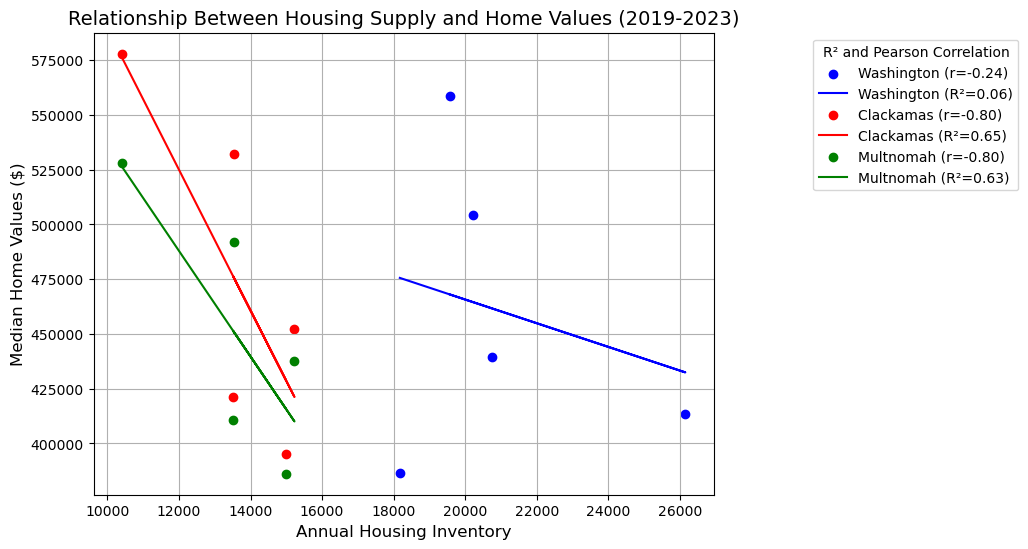

Washington County: R²=0.0554, Pearson Correlation=-0.2353
Clackamas County: R²=0.6456, Pearson Correlation=-0.8035
Multnomah County: R²=0.6323, Pearson Correlation=-0.7952


In [15]:
# Function for Combined Linear Regression Plot with Pearson Correlation
def plot_combined_regression(x_wash, x_clack, x_mult, y_wash, y_clack, y_mult, xlabel):
    plt.figure(figsize=(8, 6))

    # Linear regression & Pearson correlation for Washington County
    slope_w, intercept_w, rvalue_w, pvalue_w, stderr_w = st.linregress(x_wash, y_wash)
    correlation_w, _ = st.pearsonr(x_wash, y_wash)
    regress_values_w = x_wash * slope_w + intercept_w
    plt.scatter(x_wash, y_wash, label=f"Washington (r={correlation_w:.2f})", color="blue")
    plt.plot(x_wash, regress_values_w, "b-", label=f"Washington (R²={rvalue_w**2:.2f})")

    # Linear regression & Pearson correlation for Clackamas County
    slope_c, intercept_c, rvalue_c, pvalue_c, stderr_c = st.linregress(x_clack, y_clack)
    correlation_c, _ = st.pearsonr(x_clack, y_clack)
    regress_values_c = x_clack * slope_c + intercept_c
    plt.scatter(x_clack, y_clack, label=f"Clackamas (r={correlation_c:.2f})", color="red")
    plt.plot(x_clack, regress_values_c, "r-", label=f"Clackamas (R²={rvalue_c**2:.2f})")

    # Linear regression & Pearson correlation for Multnomah County
    slope_m, intercept_m, rvalue_m, pvalue_m, stderr_m = st.linregress(x_mult, y_mult)
    correlation_m, _ = st.pearsonr(x_mult, y_mult)
    regress_values_m = x_mult * slope_m + intercept_m
    plt.scatter(x_mult, y_mult, label=f"Multnomah (r={correlation_m:.2f})", color="green")
    plt.plot(x_mult, regress_values_m, "g-", label=f"Multnomah (R²={rvalue_m**2:.2f})")

    # Labels, Title, and Legend
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel("Median Home Values ($)", fontsize=12)
    plt.title(f"Relationship Between Housing Supply and Home Values (2019-2023)", fontsize=14)
    plt.grid(True)
    plt.legend(title="R² and Pearson Correlation", loc='upper left', bbox_to_anchor=(1.15, 1), fontsize=10)
    
    plt.show()

    # Print Pearson Correlation & R² Values
    print(f"Washington County: R²={rvalue_w**2:.4f}, Pearson Correlation={correlation_w:.4f}")
    print(f"Clackamas County: R²={rvalue_c**2:.4f}, Pearson Correlation={correlation_c:.4f}")
    print(f"Multnomah County: R²={rvalue_m**2:.4f}, Pearson Correlation={correlation_m:.4f}")

# y variables
w_homes = merged_df['Washington County: Median Home Values']
c_homes = merged_df['Clackamas County: Median Home Values']
m_homes = merged_df['Multnomah County: Median Home Values']

# X-axis variables (Houses for Sale)
w_house_count = merged_df['Washington County: Annual Housing Supply']
c_house_count = merged_df['Clackamas County: Annual Housing Supply']
m_house_count = merged_df['Multnomah County: Annual Housing Supply']

# Plot all counties on one graph with Pearson correlation
plot_combined_regression(w_house_count, c_house_count, m_house_count, w_homes, c_homes, m_homes, "Annual Housing Inventory")


# Slide Info for inventory vs home values:
**Significant correlation in Clackamas and Multnomah** → As inventory decreased, home values rose.

**Washington County had almost no relationship (R² = 0.0554)**, meaning inventory changes did not meaningfully impact home values there.

# Anaylsis
Did changes in housing inventory influence home values in Washington, Clackamas, and Multnomah Counties from 2019 to 2023?

**Null Hypothesis:** Changes in housing inventory did not significantly influence median home values in Washington, Clackamas, and Multnomah Counties from 2019 to 2023.

**Alternative Hypothesis** Changes in housing inventory had a statistically significant influence on median home values in Washington, Clackamas, and Multnomah Counties from 2019 to 2023..

**Key Findings:**
- Washington County: Weak negative correlation (r = -0.2353, R² = 0.0554), suggesting that changes in housing supply had little to no significant impact on home values.

- Clackamas County: Strong negative correlation (r = -0.8035, R² = 0.6456), indicating that as housing inventory decreased, home values increased significantly.

- Multnomah County: Strong negative correlation (r = -0.7952, R² = 0.6323), showing a similar pattern where lower housing inventory was associated with rising home values.

**Conclusion:**
Housing supply appears to significantly impact home values in Clackamas and Multnomah Counties, where lower inventory is strongly associated with higher home prices. However, in Washington County, the relationship is weak, suggesting other factors may play a larger role.